# Generalization with OOP: The MeanRevBacktester Class

## Using the MeanRevBacktester Class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
plt.style.use("seaborn")

/var/folders/k8/xm42xp_16cs6fgtvp6ymr9l40000gn/T/ipykernel_11717/1603295544.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
df = pd.read_csv("intraday_pairs.csv", parse_dates = ["time"], index_col = "time")
df.head() # 6시간 단위

,EURUSD,GBPUSD,EURAUD
time,,,
2018-01-01 22:00:00+00:00,1.201205,1.351705,1.533390
2018-01-02 04:00:00+00:00,1.207055,1.354830,1.540480
2018-01-02 10:00:00+00:00,1.204440,1.357860,1.537980
2018-01-02 16:00:00+00:00,1.205800,1.359180,1.540185
2018-01-02 22:00:00+00:00,1.204690,1.359530,1.542225


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EURUSD  2070 non-null   float64
 1   GBPUSD  2074 non-null   float64
 2   EURAUD  2071 non-null   float64
dtypes: float64(3)
memory usage: 64.8 KB


In [4]:
ptc = 0.00007 # trading cost

In [5]:
import MeanRevBacktester as MeanRev

In [6]:
tester = MeanRev.MeanRevBacktester("EURUSD", 30, 2, "2018-01-01", "2019-12-31", ptc)

In [7]:
tester

MeanRevBacktester(symbol = EURUSD, SMA = 30, dev = 2, start = 2018-01-01, end = 2019-12-31)

In [8]:
tester.test_strategy()

(1.069792, 0.132076)

In [10]:
print(tester.results.head())

                              price   returns       SMA     Lower     Upper  \
time                                                                          
2018-01-11 10:00:00+00:00  1.204915  0.008455  1.200628  1.190841  1.210415   
2018-01-11 16:00:00+00:00  1.203205 -0.001420  1.200500  1.190964  1.210035   
2018-01-11 22:00:00+00:00  1.205165  0.001628  1.200524  1.190943  1.210104   
2018-01-12 04:00:00+00:00  1.212530  0.006093  1.200748  1.190374  1.211122   
2018-01-12 10:00:00+00:00  1.214820  0.001887  1.201086  1.189583  1.212589   

                           distance  position  strategy  trades  creturns  \
time                                                                        
2018-01-11 10:00:00+00:00  0.004287       0.0  0.000000     0.0  1.008491   
2018-01-11 16:00:00+00:00  0.002705       0.0 -0.000000     0.0  1.007060   
2018-01-11 22:00:00+00:00  0.004641       0.0  0.000000     0.0  1.008700   
2018-01-12 04:00:00+00:00  0.011782      -1.0 -0.000070     1

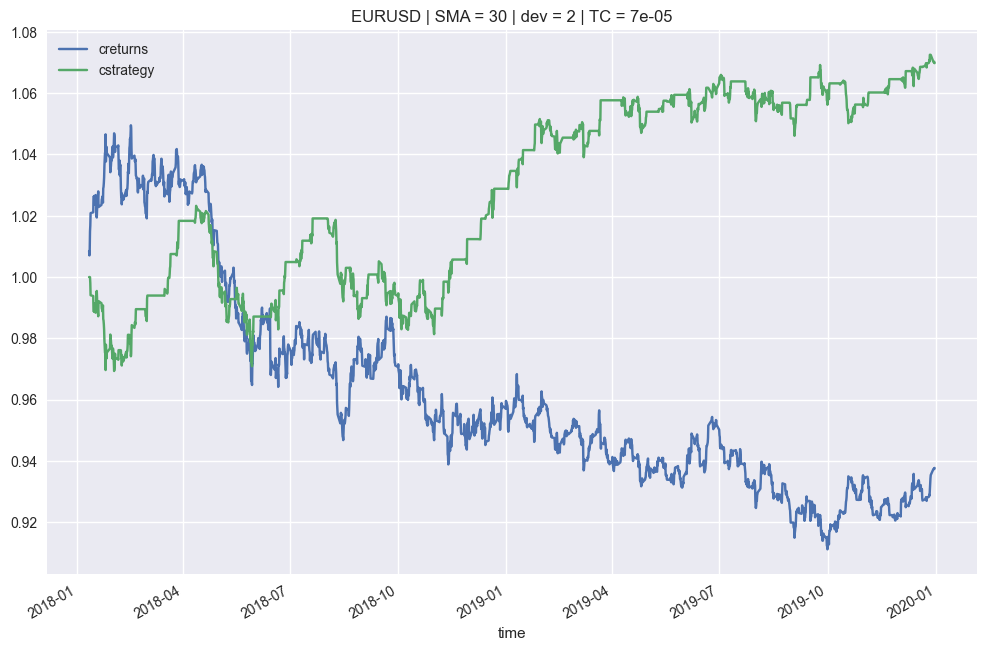

In [11]:
tester.plot_results()

In [12]:
tester.optimize_parameters((25, 100, 1), (1, 5, 1)) # SMA 범위와 표준편차 범위 optimize

((58, 1), 1.238111)

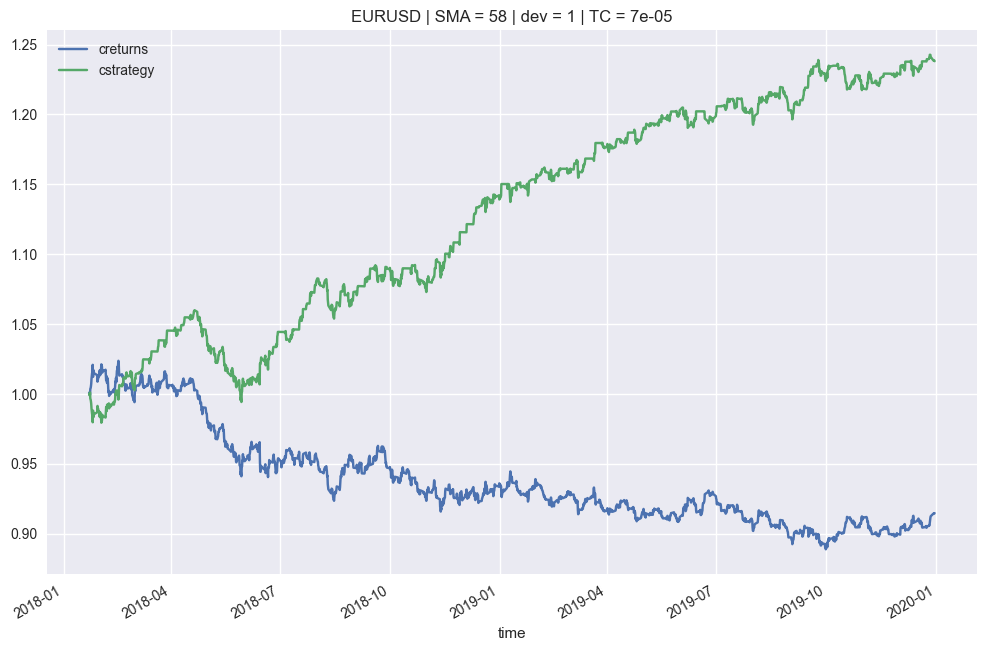

In [13]:
tester.plot_results()

In [15]:
tester.results.head()

,price,returns,SMA,Lower,Upper,distance,position,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,
2018-01-22 10:00:00+00:00,1.225370,0.000343,1.210748,1.198848,1.222648,0.014622,-1.0,-0.000343,0.0,1.000343,0.999657
2018-01-22 16:00:00+00:00,1.226135,0.000624,1.211077,1.199018,1.223136,0.015058,-1.0,-0.000624,0.0,1.000967,0.999034
2018-01-22 22:00:00+00:00,1.225780,-0.000290,1.211445,1.199267,1.223623,0.014335,-1.0,0.000290,0.0,1.000678,0.999323
2018-01-23 04:00:00+00:00,1.223765,-0.001645,1.211755,1.199495,1.224015,0.012010,-1.0,0.001645,0.0,0.999033,1.000968
2018-01-23 10:00:00+00:00,1.229295,0.004509,1.212179,1.199743,1.224614,0.017116,-1.0,-0.004509,0.0,1.003547,0.996465


In [17]:
tester.results_overview.head()

,SMA,dev,performance
0,25,1,0.995746
1,25,2,1.050603
2,25,3,1.039728
3,25,4,1.000000
4,26,1,0.995291


In [18]:
tester.results_overview.nlargest(10, "performance")

,SMA,dev,performance
132,58,1,1.238111
136,59,1,1.231034
148,62,1,1.230248
152,63,1,1.229423
128,57,1,1.228237
144,61,1,1.225364
116,54,1,1.223270
156,64,1,1.223054
140,60,1,1.222840
172,68,1,1.217669


In [19]:
tester.results_overview.nsmallest(10, "performance")
# dev4는 볼린저 밴드가 너무커서 거래가 발생하지 않았다.

,SMA,dev,performance
4,26,1,0.995291
0,25,1,0.995746
30,32,3,0.999410
3,25,4,1.000000
7,26,4,1.000000
11,27,4,1.000000
15,28,4,1.000000
19,29,4,1.000000
23,30,4,1.000000
27,31,4,1.000000


__Backtesting & Forward Testing__

In [20]:
train = MeanRev.MeanRevBacktester("EURUSD", 30, 2, "2018-01-01", "2018-12-31", ptc)

In [21]:
train.optimize_parameters((25, 100, 1), (1, 5, 1)) # in-sample

((74, 1), 1.151185)

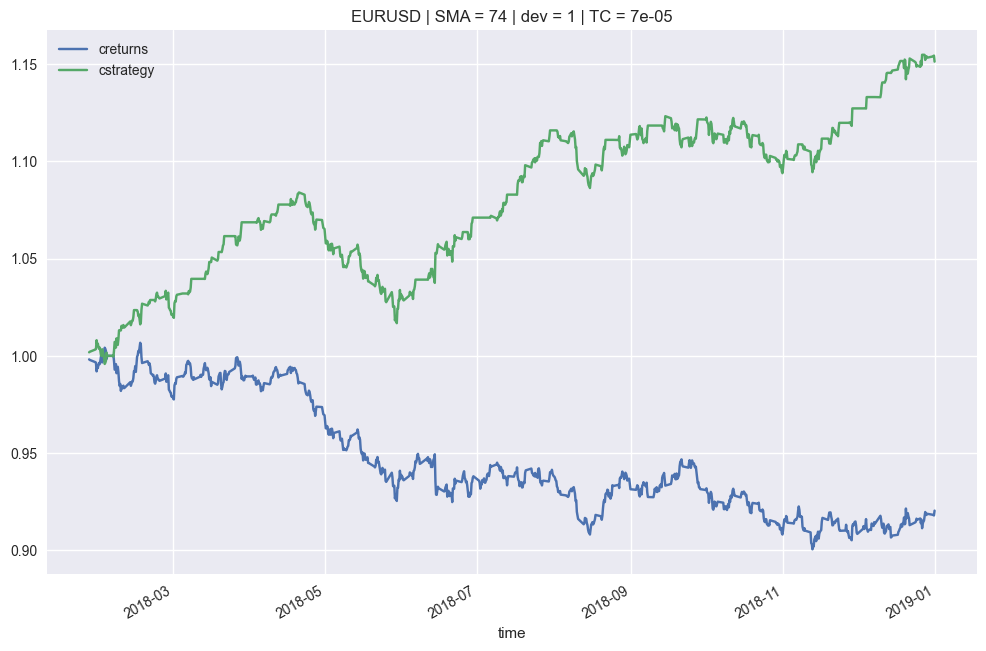

In [22]:
train.plot_results() # in-sample

In [23]:
tester = MeanRev.MeanRevBacktester("EURUSD", 74, 1, "2019-01-01", "2019-12-31", ptc) # out-sample test

In [24]:
tester.test_strategy()

(1.040341, 0.058301)

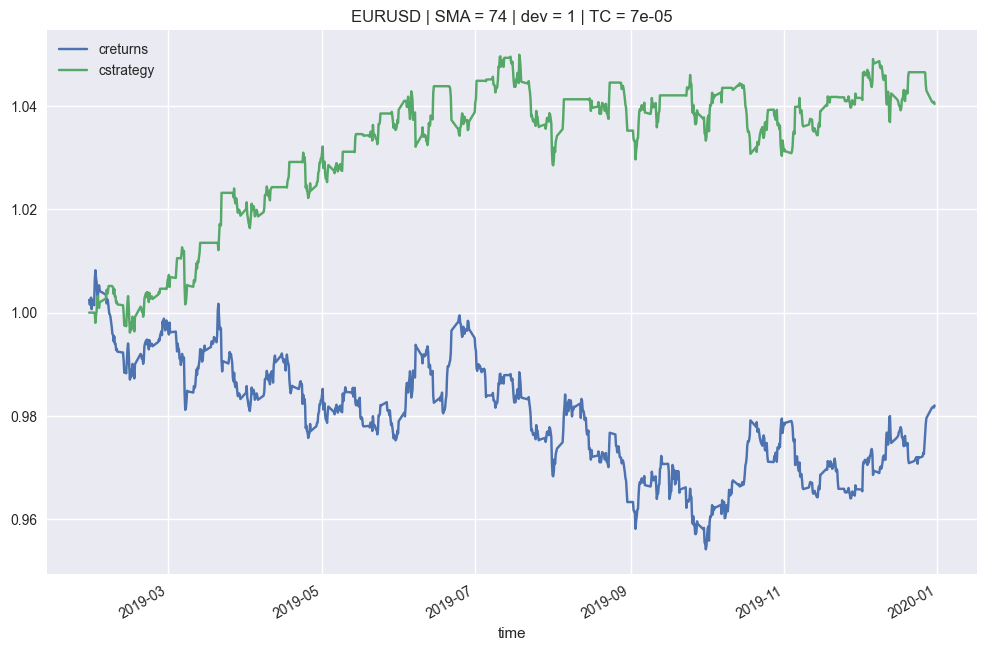

In [25]:
tester.plot_results()# 미래에도 볼린저밴드 전략은 잘 작동한다.

__GBP/USD__

In [26]:
tester = MeanRev.MeanRevBacktester("GBPUSD", 30, 2, "2018-01-01", "2019-12-31", 0)

In [27]:
tester.test_strategy()

(1.004615, 0.031372)

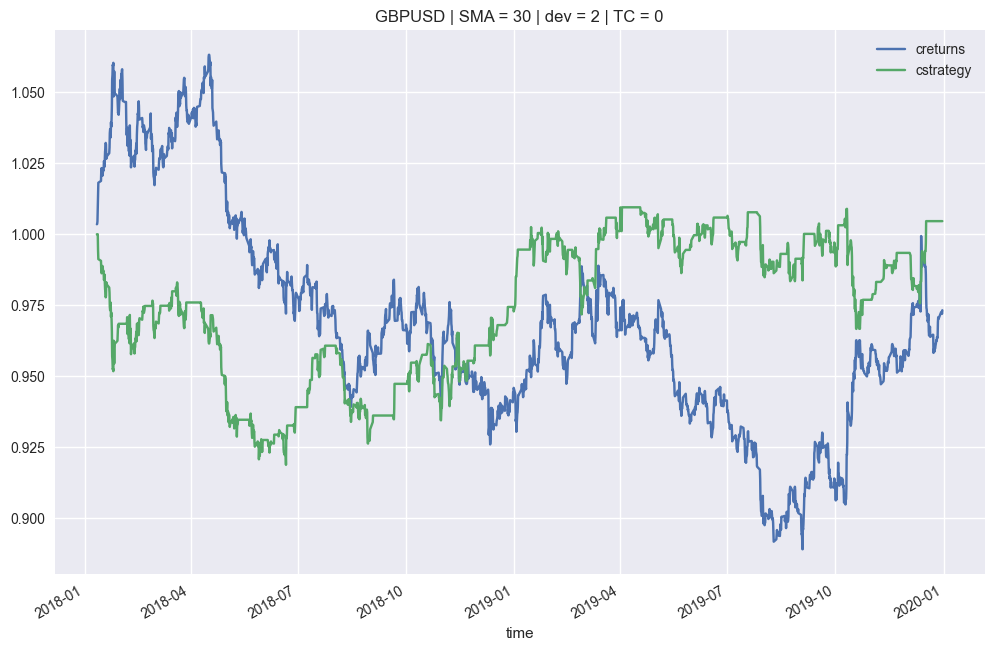

In [28]:
tester.plot_results()

In [29]:
tester.optimize_parameters((25, 100, 1), (1, 5, 1))

((79, 1), 1.178929)

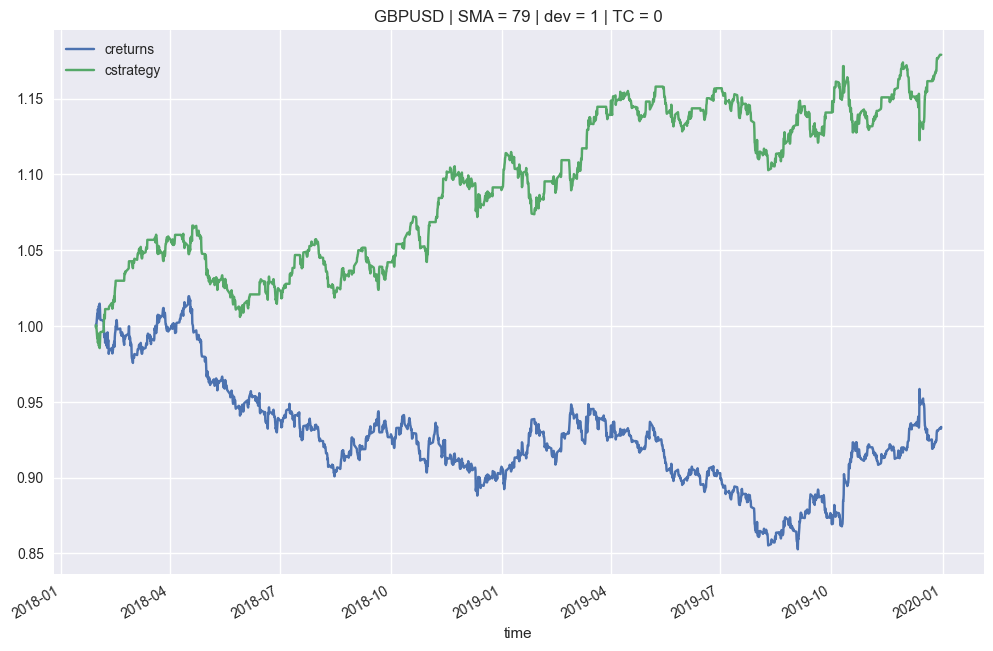

In [30]:
tester.plot_results()